# EDA

## 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

## 데이터 불러오기

In [5]:
df_age = pd.read_excel('헌혈현황(연령별).xlsx')
df_mon = pd.read_excel('헌혈현황(월별).xlsx')
df_plc = pd.read_excel('헌혈현황(장소별).xlsx')
df_job = pd.read_excel('헌혈현황(직업별).xlsx')
df_bld = pd.read_excel('헌혈현황(혈액형별).xlsx')

## 데이터 전처리 및 시각화

### 연도별 총 헌혈량

In [56]:
df_mon_total = df_mon.tail(17)[['연도', '소계']]
df_mon_total

,연도,소계
204,2005,720589
205,2006,750892
206,2007,697503
207,2008,764105
208,2009,823462
209,2010,810224
210,2011,754595
211,2012,788175
212,2013,833204
213,2014,879686


In [57]:
df_mon_total = df_mon_total.reset_index(drop = True)

df_mon_total['연도'] = pd.to_datetime(df_mon_total['연도'], format='%Y').dt.year

df_mon_total

,연도,소계
0,2005,720589
1,2006,750892
2,2007,697503
3,2008,764105
4,2009,823462
5,2010,810224
6,2011,754595
7,2012,788175
8,2013,833204
9,2014,879686


C:\Users\xlnt\AppData\Local\Temp\ipykernel_25020\1241621244.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


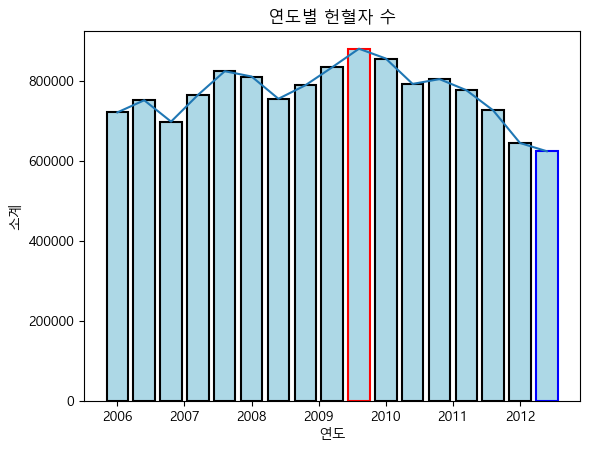

In [58]:
import matplotlib.pyplot as plt

# 데이터셋 생성
x = df_mon_total['연도']
y = df_mon_total['소계']


# 막대 그래프 생성
fig, ax = plt.subplots()
bars = ax.bar(x, y, color='lightblue', edgecolor=['blue' if i==min(y) else 'red' if i==max(y) else 'black' for i in y], linewidth=1.5)

# x 축 레이블 설정
labels = df_mon_total['연도']


# 축 레이블 생성
ax.set_xlabel('연도')
ax.set_ylabel('소계')

plt.title('연도별 헌혈자 수')

ax.set_xticklabels(labels)

ax.plot(x, y)
# 그래프 출력
# plt.savefig(r'G:\내 드라이브\신산업 과제\헌혈\결과사진\연도별 헌혈자 수.png')
plt.show();



### 2014년과 코로나 발병 이후 분석

In [14]:
df_job14 = df_job.loc[df_job.연도 == 2014]
df_age14 = df_age.loc[df_age.연도 == 2014]
df_mon14 = df_mon.loc[df_mon.연도 == 2014]
df_plc14 = df_plc.loc[df_plc.연도 == 2014]

In [59]:
print(df_job14.columns)
print(df_age14.columns)
print(df_mon14.columns)
print(df_plc14.columns)

Index(['연도', '직업', '소계', '남자', '여자'], dtype='object')
Index(['연도', '연령', '소계', '남자', '여자'], dtype='object')
Index(['연도', '소계', '남자', '여자'], dtype='object')
Index(['연도', '장소', '소계', '남자', '여자'], dtype='object')


In [16]:
print((df_job14.value_counts()))
print((df_age14.value_counts()))
print((df_plc14.value_counts()))

연도    직업    소계      남자      여자    
2014  가사    9369    68      9301      1
      고등학생  186547  105931  80616     1
      공무원   14120   11728   2392      1
      군인    145152  143815  1337      1
      기타    87669   60801   26868     1
      대학생   248851  150286  98565     1
      소계    879686  618221  261465    1
      자영업   15184   13885   1299      1
      종교직   1803    1590    213       1
      회사원   170991  130117  40874     1
dtype: int64
연도    연령      소계      남자      여자    
2014  16-19세  274895  160613  114282    1
      20-29세  395494  290401  105093    1
      30-39세  117628  93036   24592     1
      40-49세  64983   52006   12977     1
      50-59세  22374   18392   3982      1
      60세이상   4312    3773    539       1
      소계      879686  618221  261465    1
dtype: int64
연도    장소       소계      남자      여자    
2014  가두       646     438     208       1
      고등학교     83727   58905   24822     1
      군부대      109398  108857  541       1
      대학교      8532    6045    2487      

### 연령 분석과 연령별 비율

In [17]:
df_14 = df_age.loc[df_age['연도'] == 2014].reset_index(drop = True)
df_14['비율'] = df_14['소계'] / df_14.iloc[0, 2] * 100
df_14

,연도,연령,소계,남자,여자,비율
0,2014,소계,879686,618221,261465,100.000000
1,2014,16-19세,274895,160613,114282,31.249218
2,2014,20-29세,395494,290401,105093,44.958542
3,2014,30-39세,117628,93036,24592,13.371589
4,2014,40-49세,64983,52006,12977,7.387068
5,2014,50-59세,22374,18392,3982,2.543408
6,2014,60세이상,4312,3773,539,0.490175


In [18]:
df_15 = df_age.loc[df_age['연도'] == 2015].reset_index(drop = True)
df_15['비율'] = df_15['소계'] / df_15.iloc[0, 2] * 100
df_15

,연도,연령,소계,남자,여자,비율
0,2015,소계,855200,603777,251423,100.000000
1,2015,16-19세,249438,144761,104677,29.167212
2,2015,20-29세,388145,286660,101485,45.386459
3,2015,30-39세,115053,90111,24942,13.453344
4,2015,40-49세,71594,56741,14853,8.371609
5,2015,50-59세,25631,20927,4704,2.997077
6,2015,60세이상,5339,4577,762,0.624298


In [19]:
df_20 = df_age.loc[df_age['연도'] == 2020].reset_index(drop = True)
df_20['비율'] = df_20['소계'] / df_20.iloc[0, 2] * 100
df_20

,연도,연령,소계,남자,여자,비율
0,2020,소계,644113,473345,170768,100.000000
1,2020,16-19세,93711,58432,35279,14.548845
2,2020,20-29세,253565,188416,65149,39.366540
3,2020,30-39세,122283,91016,31267,18.984712
4,2020,40-49세,107878,82958,24920,16.748303
5,2020,50-59세,55622,43723,11899,8.635441
6,2020,60세이상,11054,8800,2254,1.716159


In [20]:
df_21 = df_age.loc[df_age['연도'] == 2021].reset_index(drop = True)
df_21['비율'] = df_21['소계'] / df_21.iloc[0, 2] * 100
df_21

,연도,연령,소계,남자,여자,비율
0,2021,소계,623425,455826,167599,100.000000
1,2021,16-19세,89645,58262,31383,14.379436
2,2021,20-29세,236343,173274,63069,37.910414
3,2021,30-39세,116836,86401,30435,18.740987
4,2021,40-49세,107965,81728,26237,17.318041
5,2021,50-59세,60214,46340,13874,9.658580
6,2021,60세이상,12422,9821,2601,1.992541


### 1020세대 불리해서 분석하기

In [21]:
df_age_mean = df_age.loc[df_age['연령'] == '16-19세'].reset_index(drop = True)

df_age_mean19 = df_age_mean.iloc[:15, :3]

age_mean_10 = int(df_age_mean19.소계.mean())
age_mean_10

233703

In [22]:
df_age_mean_2 = df_age.loc[df_age['연령'] == '20-29세'].reset_index(drop = True)

df_age_mean29 = df_age_mean_2.iloc[:15, :3]

age_mean_20 = int(df_age_mean29.소계.mean())

age_mean_20

354849

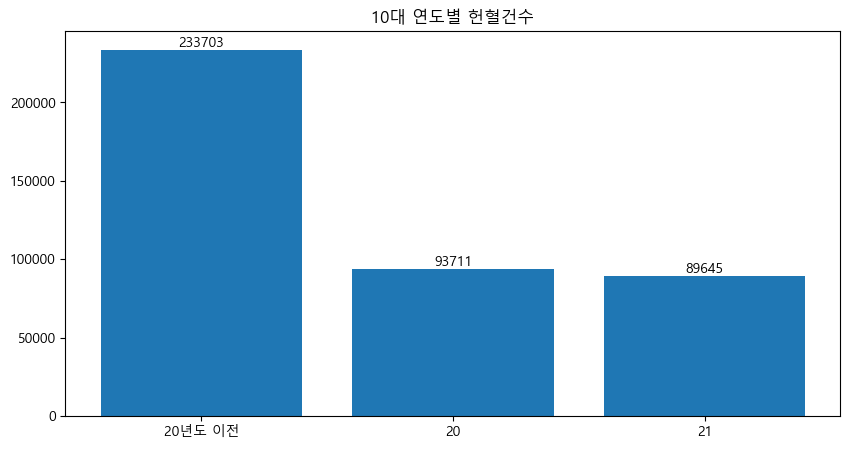

In [60]:
age_10 = pd.DataFrame({'연도': ['20년도 이전', '20', '21'], '헌혈건수': [age_mean_10, 93711, 89645]})

plt.figure(figsize=(10, 5))

x = age_10['연도']
y = age_10['헌혈건수']

plt.bar(x, y)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')
plt.title('10대 연도별 헌혈건수')

# plt.savefig(r'G:\내 드라이브\신산업 과제\헌혈\결과사진\10대 연도별 헌혈건수.png')

plt.show()

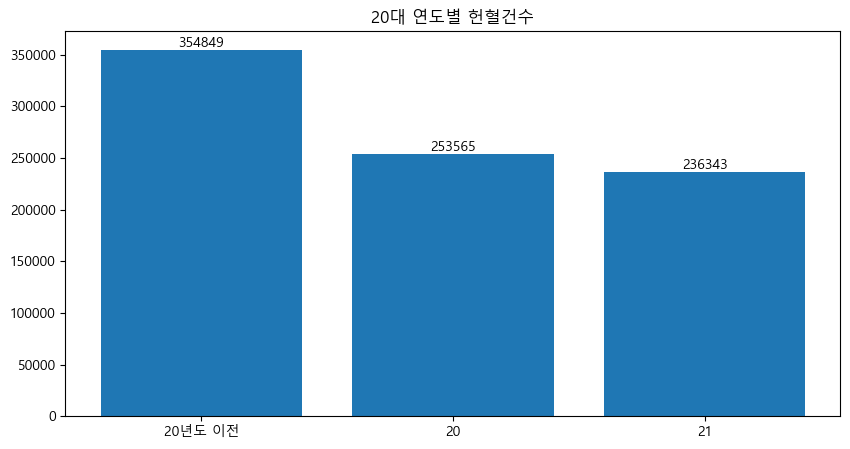

In [61]:
age_10 = pd.DataFrame({'연도': ['20년도 이전', '20', '21'], '헌혈건수': [age_mean_20, 253565, 236343]})

plt.figure(figsize=(10, 5))

x = age_10['연도']
y = age_10['헌혈건수']

plt.bar(x, y)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')
plt.title('20대 연도별 헌혈건수')

# plt.savefig(r'G:\내 드라이브\신산업 과제\헌혈\결과사진\20대 연도별 헌혈건수.png')

plt.show()

### 직업과 직업별 비율 분석

In [ ]:
df_job_sum = df_job.iloc[:,:3]

df_job_sum.pivot_table(index = '연도', columns = '직업', values = '소계', margins=True, margins_name='합계').fillna(0).astype(int)

직업,가사,고등학생,공무원,군인,기타,대학생,소계,자영업,종교직,학생,회사원,합계
연도,,,,,,,,,,,,
2005,6557,0,13813,239339,69995,0,720589,20417,2453,252144,115871,160130
2006,8104,0,13440,183382,81472,0,750892,23217,2628,304663,133986,166864
2007,7750,0,13983,113910,80366,0,697503,21346,2610,322010,135528,155000
2008,8802,0,15118,126885,86185,0,764105,21752,2484,352176,150703,169801
2009,10035,0,20330,120077,99725,0,823462,22628,2508,380165,167994,182991
2010,10245,0,16120,101207,96768,0,810224,20886,2347,406507,156144,180049
2011,9677,0,14172,84543,82053,0,754595,16988,1983,398479,146700,167687
2012,10207,172932,12916,107897,82176,229390,788175,16158,1835,0,154664,157635
2013,8797,173188,13965,139507,82934,234491,833204,15332,1670,0,163320,166640


In [25]:
df_job_14 = df_job.loc[df_job['연도'] == 2014].reset_index(drop = True)

df_job_14= df_job_14.iloc[1:, 1:3].reset_index(drop = True)

df_job_14['비율'] = df_job_14.소계 / sum(df_job_14.소계)  * 100

df_job_14

,직업,소계,비율
0,고등학생,186547,21.206089
1,대학생,248851,28.288617
2,군인,145152,16.500433
3,회사원,170991,19.437731
4,공무원,14120,1.605118
5,자영업,15184,1.726070
6,종교직,1803,0.204959
7,가사,9369,1.065039
8,기타,87669,9.965942


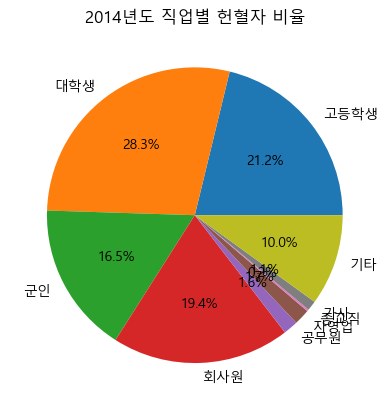

In [49]:
data = {
    "직업": ["고등학생", "대학생", "군인", "회사원", "공무원", "자영업", "종교직", "가사", "기타"],
    "비율": [21.206089, 28.288617, 16.500433, 19.437731, 1.605118, 1.726070, 0.204959, 1.065039, 9.965942],
}

# 파이 그래프 생성
plt.pie(data["비율"], labels=data["직업"], autopct="%.1f%%")

# 여백에 변수값 표시
for i, label in enumerate(data["직업"]):
    plt.annotate(label, xy=(i, data["비율"][i]), xytext=(0, 10), textcoords="offset points", va="center", ha="center")

plt.title("2014년도 직업별 헌혈자 비율")
# 그래프 표시
plt.show()

In [26]:
df_job_15 = df_job.loc[df_job['연도'] == 2015].reset_index(drop = True)
df_job_15.sort_values(by = '소계', ascending = False)

df_job_15= df_job_15.iloc[1:, 1:3].reset_index(drop = True)

df_job_15['비율'] = df_job_15.소계 / sum(df_job_15.소계)  * 100

df_job_15

,직업,소계,비율
0,고등학생,170617,19.950538
1,대학생,236566,27.662067
2,군인,147592,17.258185
3,회사원,170860,19.978952
4,공무원,15245,1.782624
5,자영업,15050,1.759822
6,종교직,1835,0.214570
7,가사,10428,1.219364
8,기타,87007,10.173877


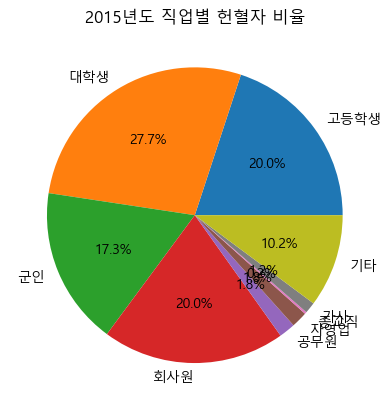

In [50]:
data = {
    "직업": ["고등학생", "대학생", "군인", "회사원", "공무원", "자영업", "종교직", "가사", "기타"],
    "비율": [19.950538, 27.662067, 17.258185, 19.978952, 1.782624, 1.759822, 0.214570, 1.219364, 10.173877],
}

# 파이 그래프 생성
plt.pie(data["비율"], labels=data["직업"], autopct="%.1f%%")

# 여백에 변수값 표시
for i, label in enumerate(data["직업"]):
    plt.annotate(label, xy=(i, data["비율"][i]), xytext=(0, 10), textcoords="offset points", va="center", ha="center")

plt.title('2015년도 직업별 헌혈자 비율')
# 그래프 표시
plt.show()

In [27]:
df_job_20 = df_job.loc[df_job['연도'] == 2020].reset_index(drop = True)

df_job_20= df_job_20.iloc[1:, 1:3].reset_index(drop = True)
df_job_20['비율'] = df_job_20.소계 / sum(df_job_20.소계)  * 100

df_job_20

,직업,소계,비율
0,고등학생,55697,8.647085
1,대학생,124925,19.394889
2,군인,103744,16.106491
3,회사원,227286,35.286666
4,공무원,22019,3.418500
5,자영업,17042,2.645809
6,종교직,1791,0.278057
7,가사,12171,1.889575
8,기타,79438,12.332929


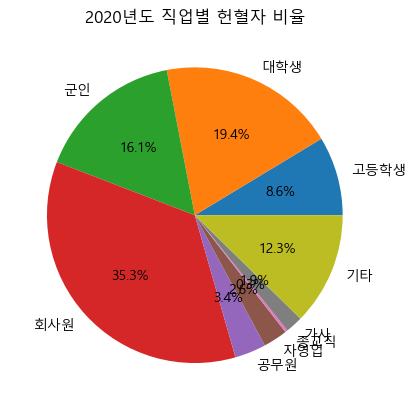

In [51]:
data = {
    "직업": ["고등학생", "대학생", "군인", "회사원", "공무원", "자영업", "종교직", "가사", "기타"],
    "비율": [8.647085, 19.394889, 16.106491, 35.286666, 3.418500, 2.645809, 0.278057, 1.889575, 12.332929],
}

# 파이 그래프 생성
plt.pie(data["비율"], labels=data["직업"], autopct="%.1f%%")

# 여백에 변수값 표시
for i, label in enumerate(data["직업"]):
    plt.annotate(label, xy=(i, data["비율"][i]), xytext=(0, 10), textcoords="offset points", va="center", ha="center")

plt.title('2020년도 직업별 헌혈자 비율')
# 그래프 표시
plt.show()

In [28]:
df_job_21 = df_job.loc[df_job['연도'] == 2021].reset_index(drop = True)

df_job_21= df_job_21.iloc[1:, 1:3].reset_index(drop = True)

df_job_21

,직업,소계
0,고등학생,51748
1,대학생,127647
2,군인,86420
3,회사원,229160
4,공무원,20891
5,자영업,16312
6,종교직,1933
7,가사,12341
8,기타,76973


In [29]:
df_job_21['비율'] = df_job_21.소계 / sum(df_job_21.소계)  * 100

df_job_21

,직업,소계,비율
0,고등학생,51748,8.300598
1,대학생,127647,20.475117
2,군인,86420,13.862133
3,회사원,229160,36.758231
4,공무원,20891,3.351005
5,자영업,16312,2.616514
6,종교직,1933,0.310061
7,가사,12341,1.979548
8,기타,76973,12.346794


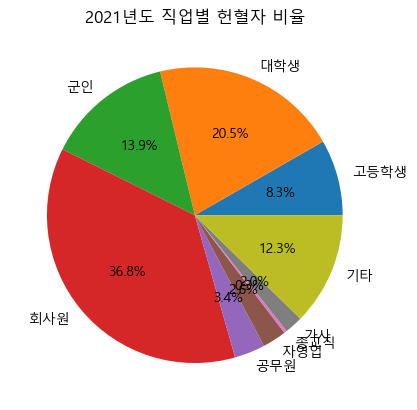

In [52]:
# 데이터 준비
data = {
    "직업": ["고등학생", "대학생", "군인", "회사원", "공무원", "자영업", "종교직", "가사", "기타"],
    "비율": [8.300598, 20.475117, 13.862133, 36.758231, 3.351005, 2.616514, 0.310061, 1.979548, 12.346794],
}

# 파이 그래프 생성
plt.pie(data["비율"], labels=data["직업"], autopct="%.1f%%")

# 여백에 변수값 표시
for i, label in enumerate(data["직업"]):
    plt.annotate(label, xy=(i, data["비율"][i]), xytext=(0, 10), textcoords="offset points", va="center", ha="center")

plt.title('2021년도 직업별 헌혈자 비율')
# 그래프 표시
plt.show()

### 장소 분석

In [34]:
df_plc.head()

# 가두 : 현혈 버스 에서의 헌혈량일 올라갔네?

,연도,장소,소계,남자,여자
0,2005,소계,720589,592339,128250
1,2005,소계,365996,328835,37161
2,2005,학교,93669,67798,25871
3,2005,군부대,213977,213638,339
4,2005,종교단체,12823,9044,3779


In [35]:
df_plc_pv = df_plc.pivot_table(index = '연도', columns = '장소', values = '소계', aggfunc='sum')
df_plc_pv

장소,가두,고등학교,군부대,대학교,소계,원내(혈액원),일반단체,종교단체,학교,헌혈의집
연도,,,,,,,,,,
2005,63143.0,NaN,213977.0,NaN,1441178.0,11713.0,45527.0,12823.0,93669.0,279737.0
2006,61732.0,NaN,157114.0,NaN,1501784.0,12205.0,42763.0,9745.0,102844.0,364489.0
2007,51428.0,NaN,90974.0,NaN,1395006.0,11120.0,46236.0,5659.0,98710.0,393376.0
2008,40747.0,NaN,103845.0,NaN,1528210.0,11013.0,49630.0,4487.0,93915.0,460468.0
2009,39924.0,NaN,91655.0,NaN,1646924.0,12249.0,57134.0,3099.0,77560.0,541841.0
2010,11976.0,NaN,73433.0,NaN,1620448.0,12522.0,40130.0,1529.0,85548.0,585086.0
2011,6018.0,NaN,57973.0,NaN,1509190.0,12526.0,34508.0,2433.0,79353.0,561784.0
2012,5565.0,70203.0,78697.0,10323.0,1576350.0,14127.0,33512.0,2565.0,NaN,573183.0
2013,1371.0,75190.0,107078.0,8041.0,1666408.0,14987.0,32913.0,884.0,NaN,592740.0


Text(0.5, 1.0, '고등학교 헌혈건 수')

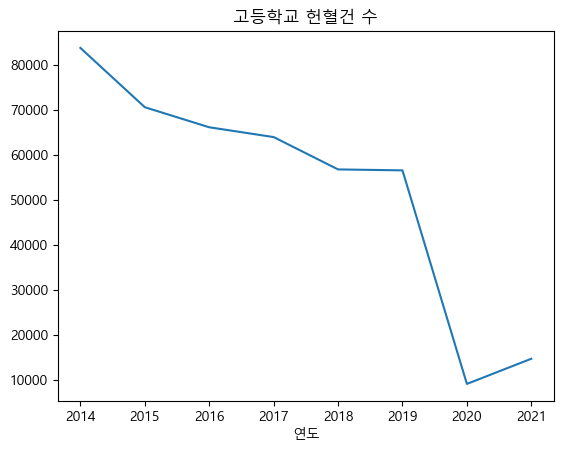

In [62]:
df_plc_pv.iloc[9:, 1].astype(int).plot()

plt.title('고등학교 헌혈건 수')

# plt.savefig(r'G:\내 드라이브\신산업 과제\헌혈\결과사진\고등학교 헌혈건 수.png')

### 내용 추가

| 헌혈 경험 | 계속 헌혈할 가능성 | 더 자주 헌혈할 가능성 |
|---|---|---|
| 예 | 3배 더 높음 | 2배 더 높음 |
| 아니오 | 1 | 1 |


- 미국적십자 조사 결과 추가

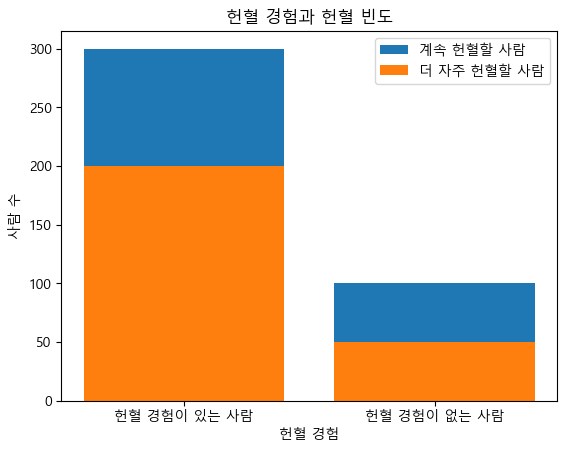

In [38]:
blood_donors = [500, 500]
continue_donors = [300, 100]
more_frequent_donors = [200, 50]

# 막대 그래프 생성
plt.bar(["헌혈 경험이 있는 사람", "헌혈 경험이 없는 사람"], continue_donors, label="계속 헌혈할 사람")
plt.bar(["헌혈 경험이 있는 사람", "헌혈 경험이 없는 사람"], more_frequent_donors, label="더 자주 헌혈할 사람")

# 축 설정
plt.xlabel("헌혈 경험")
plt.ylabel("사람 수")
plt.title("헌혈 경험과 헌혈 빈도")
plt.legend()

# 그래프 표시
plt.show()

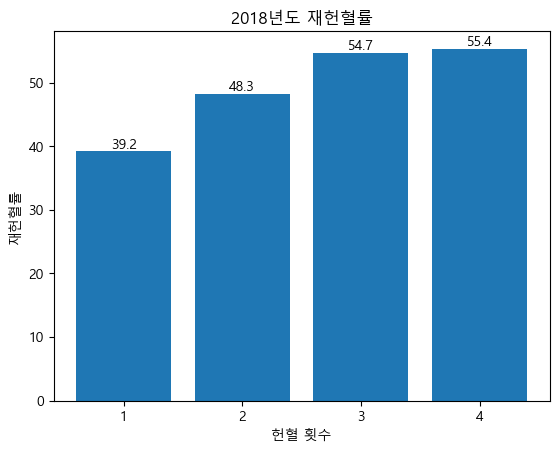

In [47]:
# 재헌혈률

blood_donation_rates = [39.2, 48.3, 54.7, 55.4]
x_axis = ['1', '2', '3', '4']

# 막대 그래프를 만듭니다.
plt.bar(x_axis, blood_donation_rates)

# 막대 위에 변수값을 표시합니다.
for i, blood_donation_rate in enumerate(blood_donation_rates):
    plt.text(x_axis[i], blood_donation_rate, blood_donation_rate, ha="center", va="bottom")

# 축에 레이블을 지정합니다.
plt.xlabel("헌혈 횟수")
plt.ylabel("재헌혈률")
plt.title("2018년도 재헌혈률")

# 그래프를 표시합니다.
plt.savefig(r'G:\내 드라이브\신산업 과제\헌혈\결과사진\재헌혈률.png')

plt.show()

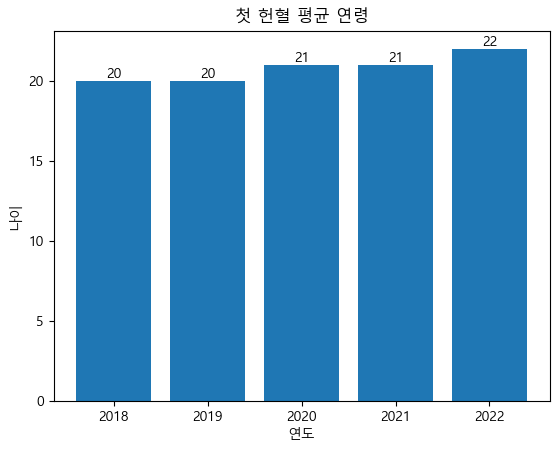

In [54]:
# 첫 헌혈 평균 연령
import matplotlib.pyplot as plt

# 연도와 연령 데이터
years = [2018, 2019, 2020, 2021, 2022]
ages = [20, 20, 21, 21, 22]

# 막대 그래프 생성
plt.bar(years, ages)

# 변수 값 표시
for i in range(len(years)):
    plt.text(years[i], ages[i], str(ages[i]), ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('첫 헌혈 평균 연령')
plt.xlabel("연도")
plt.ylabel("나이")


# 그래프 출력
plt.show()
